In [128]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [129]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

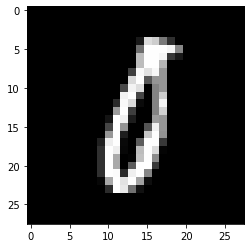

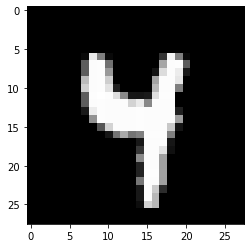

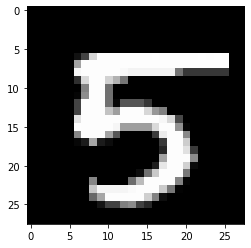

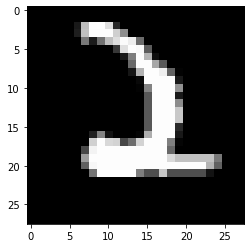

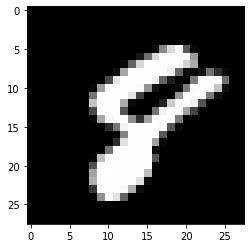

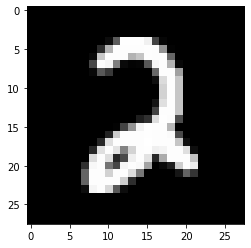

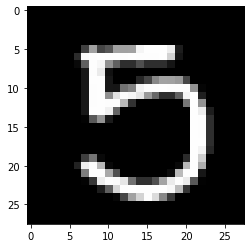

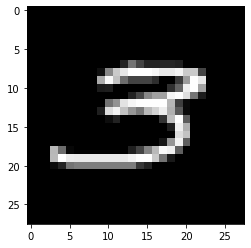

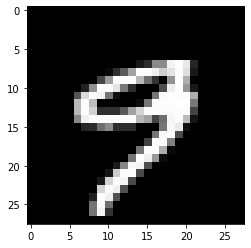

In [130]:
for i in range(9):
    plt.imshow(X_train[i], cmap='gray')
    plt.show()

In [131]:
# normalize data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
X_val = tf.keras.utils.normalize(X_val, axis=1)

In [132]:
# create the model
model = tf.keras.models.Sequential()
# add Flaten layer
model.add(tf.keras.layers.Flatten())
# add input and hiden layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# add output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [133]:
# early stopping method
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [134]:
# train the model
model.fit(x=X_train, y=y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32, callbacks=[callback])

Epoch 1/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.2820 - accuracy: 0.9182 - val_loss: 0.1548 - val_accuracy: 0.9520
Epoch 2/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.1168 - accuracy: 0.9632 - val_loss: 0.1233 - val_accuracy: 0.9649
Epoch 3/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.0774 - accuracy: 0.9754 - val_loss: 0.1076 - val_accuracy: 0.9692
Epoch 4/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.0567 - accuracy: 0.9813 - val_loss: 0.1054 - val_accuracy: 0.9690
Epoch 5/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.0411 - accuracy: 0.9865 - val_loss: 0.1162 - val_accuracy: 0.9688
Epoch 6/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.0315 - accuracy: 0.9893 - val_loss: 0.1016 - val_accuracy: 0.9719
Epoch 7/50
1594/1594 [==============================] - 3s 2ms/step - loss: 0.0254 - accuracy: 0.9914 - val_loss: 0.1193 - val_accuracy:

In [135]:
# evaluare the model
test_loss, test_acc = model.evaluate(x=X_test, y=y_test)

print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.1805 - accuracy: 0.9712
Test accuracy: 0.9711999893188477


In [136]:
# prediction
predictions = model.predict(X_test)

print(np.argmax(predictions[500]))

3


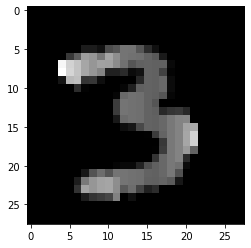

In [137]:

plt.imshow(X_test[500], cmap='gray')
plt.show()